<a href="https://colab.research.google.com/github/mickeykim70/DL_scratch/blob/main/neural_mnist_error.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import sys, os
sys.path.append("/content/drive/MyDrive/deep-learning-from-scratch-master/")
import numpy as np
import pickle
from dataset.mnist import load_mnist
from common.functions import sigmoid, softmax
import matplotlib.pyplot as plt

In [4]:
def get_data():
    (x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, flatten=True, one_hot_label=False)
    return x_test, t_test

In [5]:
def init_network():
    with open("/content/drive/MyDrive/deep-learning-from-scratch-master/ch03/sample_weight.pkl", 'rb') as f:
        network = pickle.load(f)
    return network

In [6]:
def predict(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3'],
    b1, b2, b3 = network['b1'], network['b2'], network['b3'],

    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = softmax(a3)

    return y

In [13]:
x, t = get_data()
network = init_network()
error = []
P = []

for i in range(len(x)):
    y = predict(network, x[i])
    p = np.argmax(y)
    if p != t[i]:
        error.append(i)
        P.append(p)
print(error)
print(P)

[8, 33, 66, 92, 124, 149, 217, 233, 241, 245, 247, 259, 290, 300, 313, 320, 321, 340, 341, 352, 358, 362, 381, 445, 448, 449, 478, 479, 495, 502, 507, 511, 531, 543, 551, 565, 569, 578, 582, 591, 610, 619, 627, 629, 659, 684, 691, 707, 717, 720, 740, 791, 810, 839, 844, 857, 881, 882, 898, 924, 938, 939, 947, 950, 956, 965, 982, 999, 1014, 1032, 1039, 1044, 1050, 1062, 1068, 1082, 1107, 1112, 1114, 1119, 1124, 1181, 1191, 1192, 1194, 1198, 1204, 1206, 1224, 1226, 1232, 1242, 1247, 1251, 1256, 1260, 1283, 1289, 1299, 1319, 1325, 1326, 1328, 1337, 1364, 1378, 1393, 1410, 1413, 1429, 1433, 1440, 1444, 1465, 1466, 1467, 1494, 1500, 1522, 1525, 1527, 1530, 1549, 1553, 1559, 1569, 1581, 1601, 1609, 1621, 1634, 1640, 1671, 1678, 1681, 1696, 1709, 1717, 1722, 1732, 1737, 1751, 1754, 1759, 1765, 1772, 1773, 1782, 1790, 1800, 1813, 1828, 1850, 1857, 1865, 1878, 1880, 1901, 1913, 1917, 1930, 1938, 1952, 1955, 1956, 1970, 1973, 1981, 1984, 2016, 2024, 2035, 2040, 2043, 2044, 2053, 2068, 2070, 2098

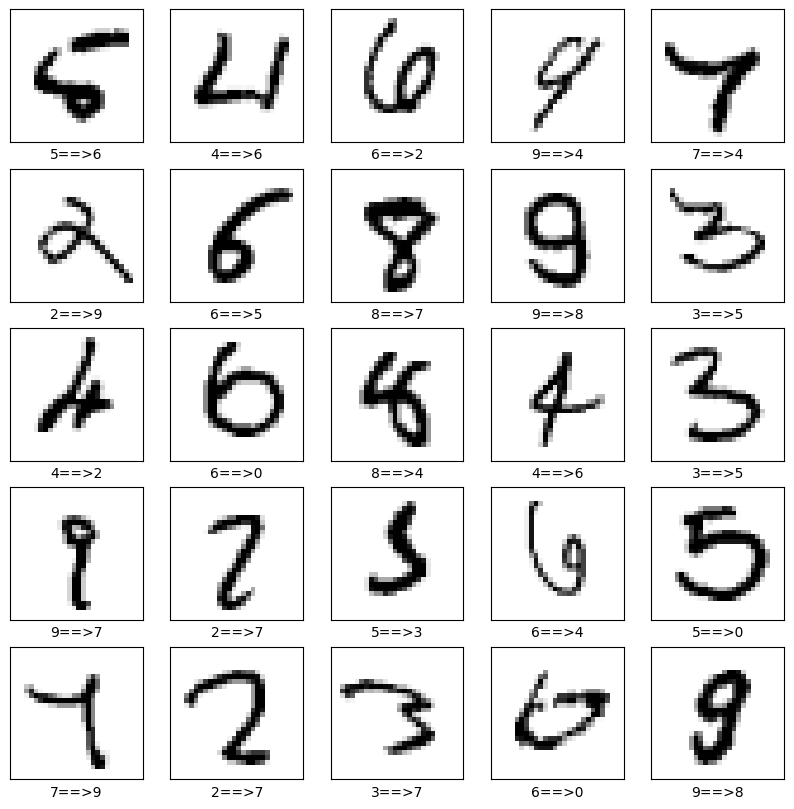

In [16]:
plt.figure(figsize=(10,10))

for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x[error[i]].reshape(28,28), cmap=plt.cm.binary)
    plt.xlabel(str(t[error[i]]) + "==>" + str(P[i]))
plt.show()
